<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/kaggle_titanic_test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 

import missingno as msno
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/train.csv')

In [ ]:
df_train.head()

# Exploratory data analysis

1 Pclass

In [10]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).sum()

,Survived
Sex,
female,233
male,109


In [11]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).count()

,Survived
Sex,
female,314
male,577


In [12]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [13]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


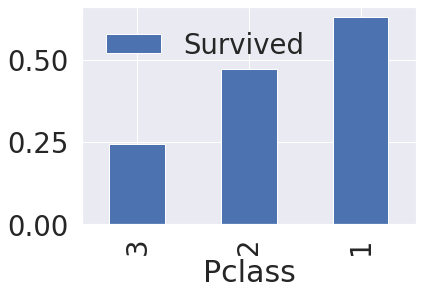

In [17]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=True).plot.bar()

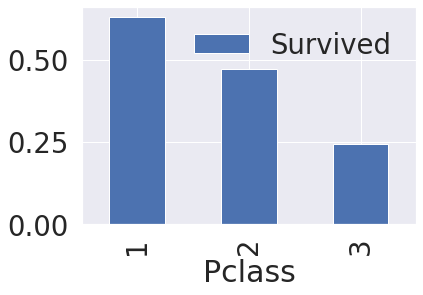

In [18]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
# sort_values : Pclass, 내림차순 (1>2>3)

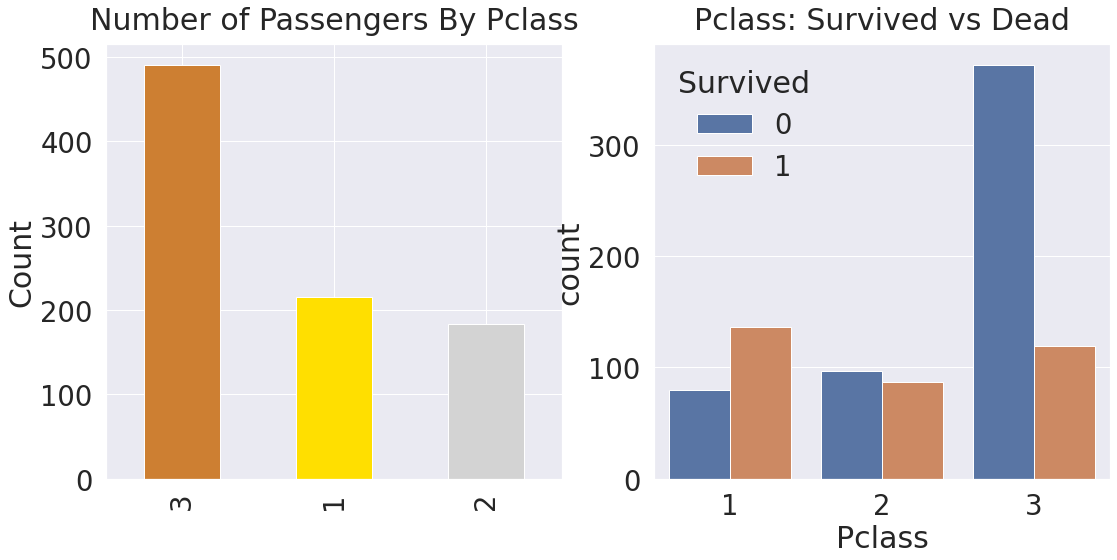

In [23]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position )
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

https://seaborn.pydata.org/generated/seaborn.countplot.html

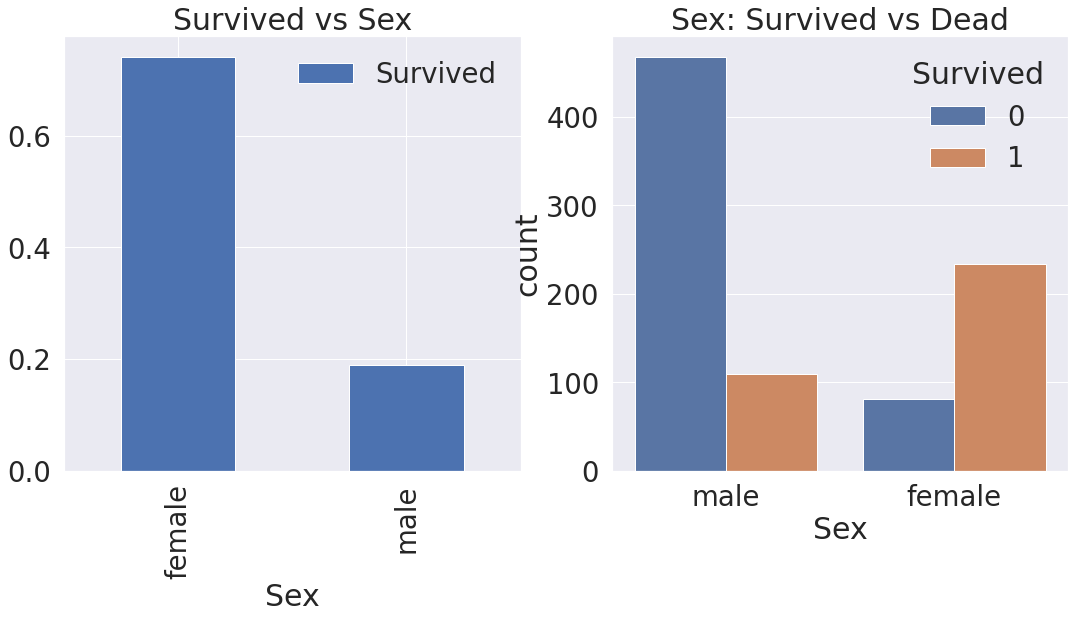

In [3]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

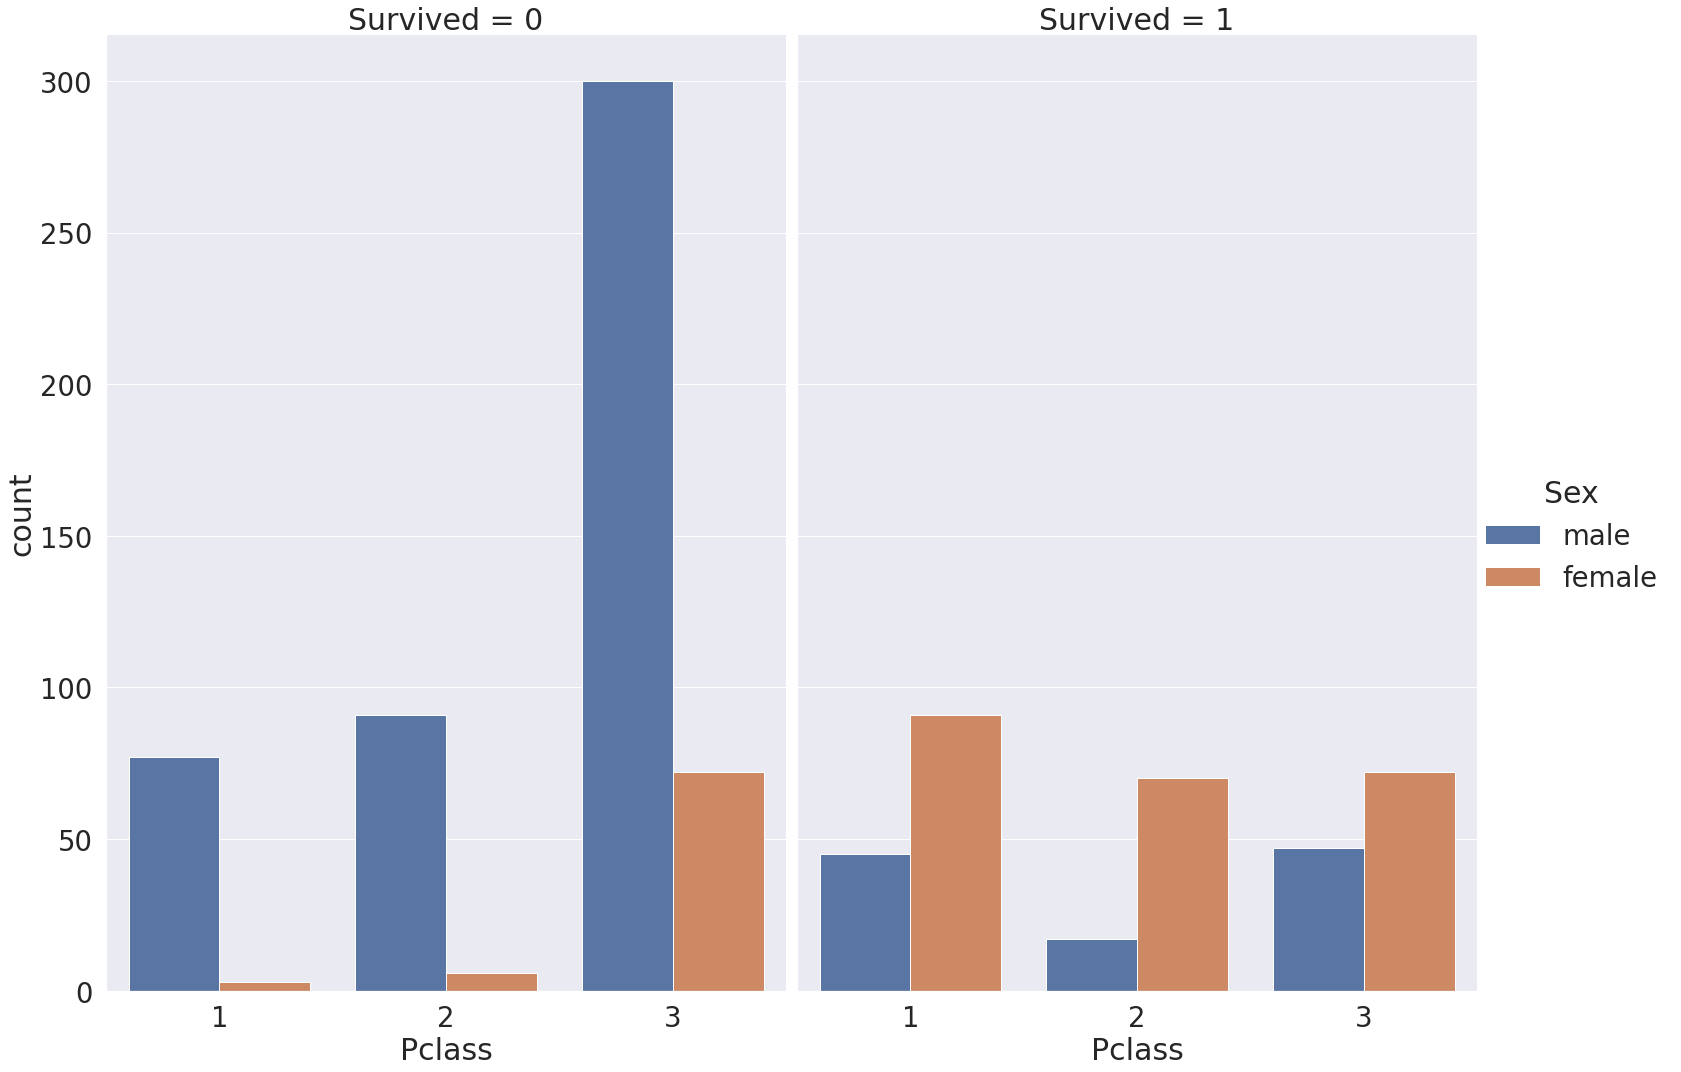

In [15]:
# sns.catplot('Pclass', 'Survived', hue='Sex', data=df_train, 
#                size=6, aspect=1.5)
sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df_train, kind="count",
                size=15, aspect=0.7);

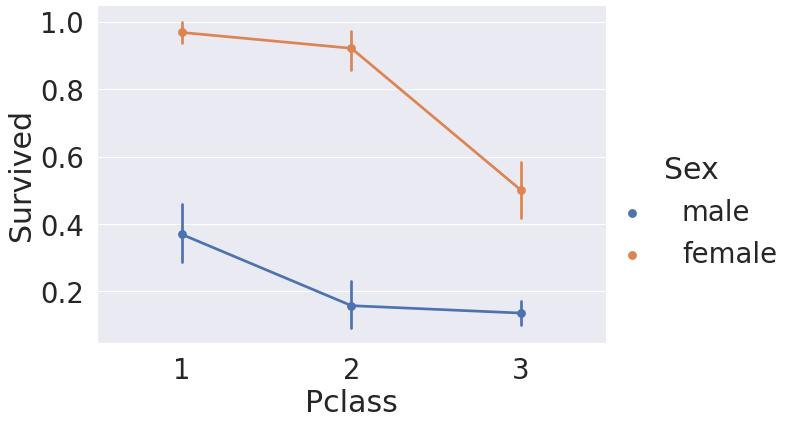

In [16]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)

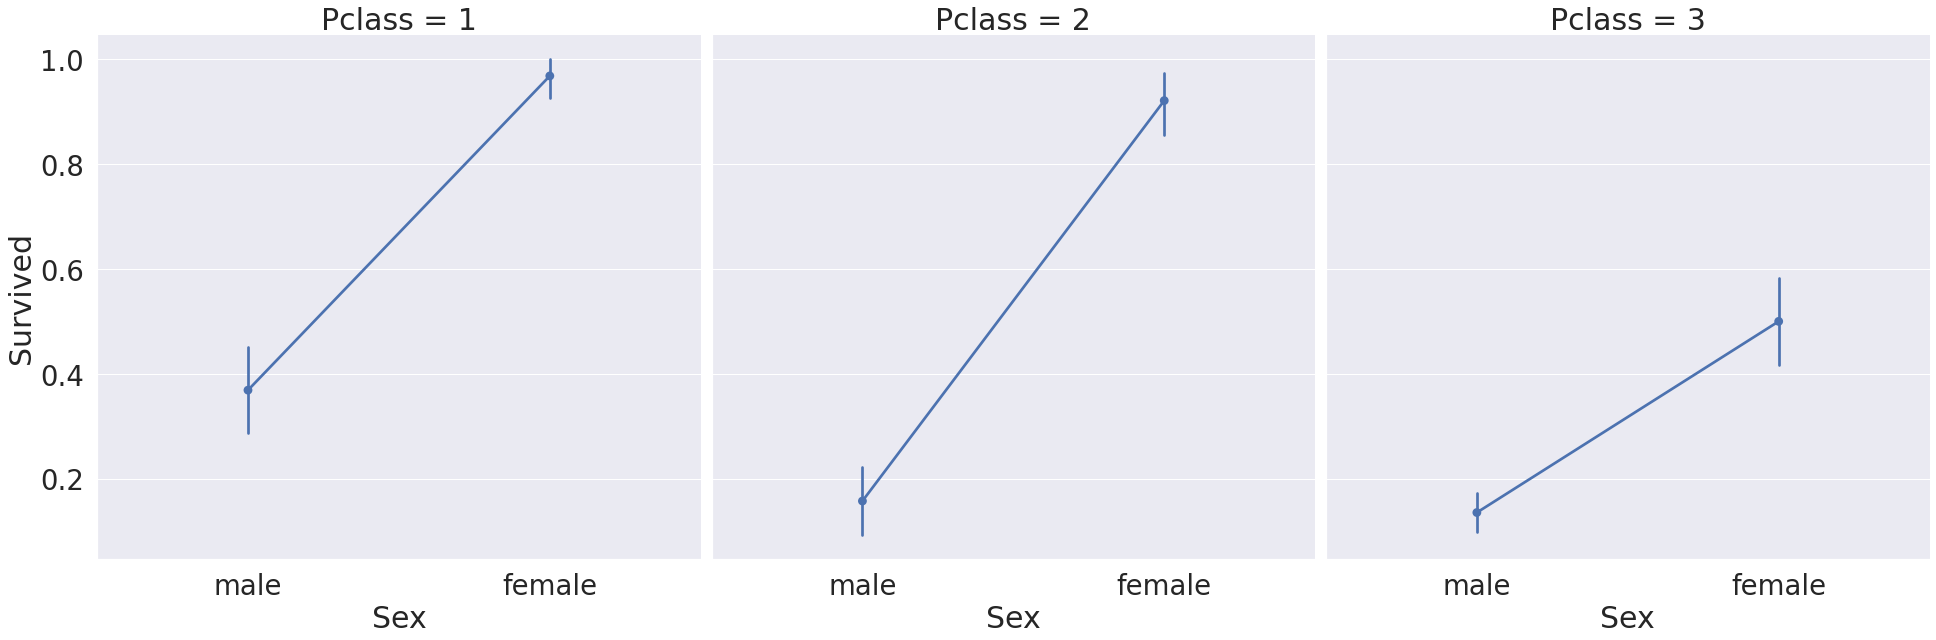

In [17]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5,
               size=9, aspect=1
              )

# Age

In [18]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


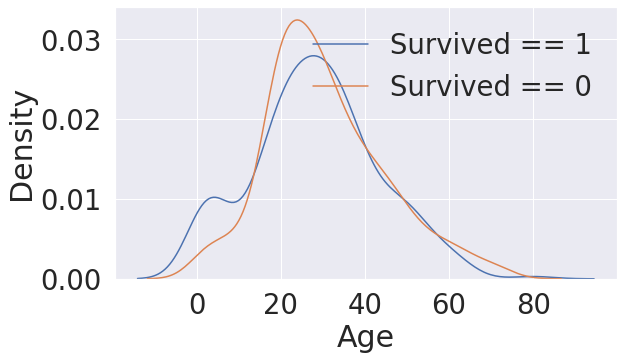

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

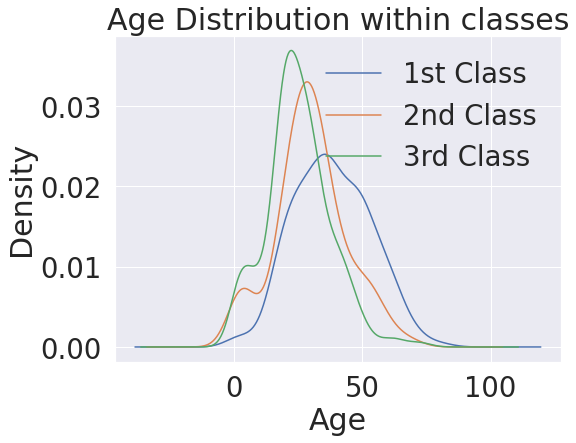

In [20]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

티켓을 pclass와 연관지어서 카운트 해보고 분류를 해보자!